In [ ]:
"""
- Dividing the dataset -------------------------------------------------------------------------------------------------------------------
CIFAR100 data was downloaded in https://www.cs.utoronto.ca/~kriz/cifar.html in which I use an already existing function called unpickle(file) to 
extract the nesccary batchfiles containng data, and label in which I'll specific fine” label to grab the 100 different files.

Using this data extract I'll specify the train and test data. Then I'll access only key of b'fine_labels', and b'data' as it will be the data need for
this assignment

The image data of train_x and text_x will converted to pyTorch tensors and reshaped a standard that is require for PyTorch convolutional networks.
'255.0' value normalization for pixel values of rgb. Additonal normalization is applied to scale the pixel value  scaling the range to [-1, 1]

The TensorDataset is created for both training and test data combine image and label tensor together. The random into a training and a validation set.
 80% of the data is kept for training (subtrain_dataset) and the remaining 20% for validation (validation_dataset). Hence the dividing set process.

 - Selecting the model '2c.#'s' -------------------------------------------------------------------------------------------------------------------
    - LeNet1998 modified
        - details in Model_1.ipynb
    - AlexNet2012 modifed
        - detials in Model_2.ipynb
    - Simple 2-layer CNN modfied
        - details in Model_3.ipynb

 - Testing for accuracy-------------------------------------------------------------------------------------------------------------------
Testing data is extracted through https://www.cs.utoronto.ca/~kriz/cifar.html and will be extracted test_x and test_y 
these values will be converted into tensor and will be dataloader to 10000 images unseen data that will be tested upon my three models
testing for accuracy will check the label of 100 classes and determine if they were correctly predicted
 """

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split, TensorDataset
from torch import nn, optim
import torch
import torchvision
import torchvision.transforms as transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [64]:
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 
           'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 
           'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 
           'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 
           'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 
           'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 
           'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 
           'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
50000
[[255 255 255 ...  10  59  79]
 [255 253 253 ... 253 253 255]
 [250 248 247 ... 194 207 228]
 ...
 [248 240 236 ... 180 174 205]
 [156 151 151 ... 114 107 126]
 [ 31  30  31 ...  72  69  67]]
(50000, 3072)
(3, 32, 32)
(32, 32, 3)


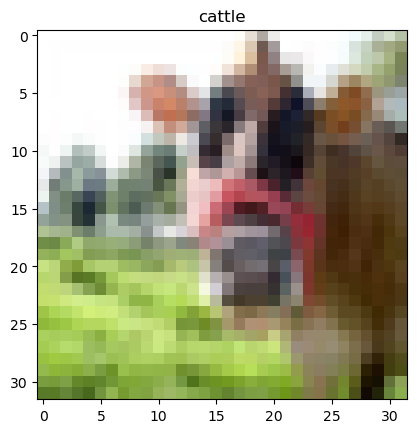

In [70]:
#find path to the folder
file_path = "C:/Users/Johnn/OneDrive/Documents/CNN/Models"
data_dir = 'C:/Users/Johnn/OneDrive/Documents/CNN/Models/cifar-100-python'


# Function to load a file from the dataset
def unpickle(file_path):
    with open(file_path, 'rb') as file:
        dict  = pickle.load(file, encoding='bytes')
    return dict

# Load the training and test data
train_data = unpickle(f'{data_dir}/train')
test_data = unpickle(f'{data_dir}/test')

print(train_data.keys())
print(train_data
# fine labels identify the class of the image
print(len(train_data[b'fine_labels']))
# Will access the data values
print(train_data[b'data'])
print(train_data[b'data'].shape)

# visualize the cifar-100 image by reshaping
image = train_data[b'data'][0]
lab = train_data[b'fine_labels'][0]
# divide 3 channels represents into rgb by 32x32 matrixs 
image = image.reshape(3, 32, 32)
print(image.shape)
# transpose it to 32 x 32 x 3 
image = image.transpose(1, 2, 0)
print(image.shape)
plt.title(classes[lab])
plt.imshow(image)

In [54]:
# Split the training data into a training and a validation set
# Accessing the fine_labels from dic will ensure that the model will predict 100 Classes rather than the super-classes
# train_x raw pixel data for the images, train_y class identifiers you that it needs to predict
train_x, train_y = train_data[b'data'], train_data[b'fine_labels']
test_x, test_y = test_data[b'data'], test_data[b'fine_labels']
# ensure that the images and specific classes match same length
print(f'Train data: {len(train_x)} , Validation data: {len(train_y)}')
print(f'{type(train_x)}, {type(train_y)}')
# convert to tensors
train_x = torch.tensor(train_x, dtype=torch.float32).view(-1, 3, 32, 32) / 255.0
train_y = torch.tensor(train_y, dtype=torch.long)
test_x = torch.tensor(test_x, dtype=torch.float32).view(-1, 3, 32, 32) / 255.0
test_y = torch.tensor(test_y, dtype=torch.long)
print(train_x.shape)

# Normalize the tensors using the given mean and std
mean = torch.tensor([0.5, 0.5, 0.5]).view(1, 3, 1, 1)
std = torch.tensor([0.5, 0.5, 0.5]).view(1, 3, 1, 1)
train_x = (train_x - mean) / std
test_x = (test_x - mean) / std


full_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(len(full_dataset))
print(len(test_dataset))



Train data: 50000 , Validation data: 50000
<class 'numpy.ndarray'>, <class 'list'>
torch.Size([50000, 3, 32, 32])
50000
10000


# re-training by Full Training 

In [56]:
def train_model(model, optimizer, criterion, full_dataset, batch_size, num_epochs):
    # Create data loaders for the training and validation sets
    fulltrain_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    tr_acc, tr_loss = [], []
    
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        total_train = 0
        correct_train = 0
        for images, labels in fulltrain_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
    
            # Calculate predictions for train accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        train_accuracy = correct_train / total_train
        tr_acc.append(train_accuracy)
        train_loss = running_loss / len(fulltrain_loader)
        tr_loss.append(train_loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch}/{num_epochs}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    print('Training Completed')
    return tr_acc, tr_loss



def test_model(model,test_loader):
    #model = model.to(device)
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        n_class_correct = [0 for i in range(100)]
        n_class_samples = [0 for i in range(100)]
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            for i in range(labels.size(0)):
                label = labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1
                
    test_accuracy = 100 * (correct / total)
    print(f'Test Accuracy: {test_accuracy:.4f}%')
    
    for i in range(100):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


    

In [25]:
batch_size = 64
num_epochs = 100

In [26]:
# First mode
class CNN_LeNet(nn.Module):
    def __init__(self):
        super(CNN_LeNet, self).__init__()

        # Input size for image CIFAR100 32x32 3 color channel  
        # Layer 1: Conv2d + LeakyReLU + Average Pooling

        # Input: 32x32x3
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), 
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4)
        )
        # Output size: 16x16x32

        # Layer 2: Conv2d + ReLU + Average Pooling
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5), # Increase from 32 to 64 channels
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4)
        )
        # Output size: 6x6x64 (without padding)

        # Fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=64 * 6 * 6, out_features=240, bias=True),  
            nn.LeakyReLU(),
            nn.Dropout(0.5),
            nn.BatchNorm1d(240)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=240, out_features=120, bias=True),
            nn.ReLU()
        )
        # Output layer
        self.fc3 = nn.Linear(in_features=120, out_features=100)  
        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc1(out)
        out = self.fc2(out) 
        out = self.fc3(out) # criterion handle the softmax by the CrossEntropyLoss clasisfcation 
        return out


In [27]:
# Initialize the model
model1 = CNN_LeNet().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss().to(device)
# Examine the effects in Adam   
optimizer1= optim.Adam(model1.parameters(),lr=1e-4, betas=(0.78, 0.90))

In [33]:
tr_acc, tr_loss = train_model(model1, optimizer1, criterion, full_dataset, batch_size, num_epochs)

Epoch 9/100, Training Loss: 1.9846, Training Accuracy: 0.4629
Epoch 19/100, Training Loss: 1.9650, Training Accuracy: 0.4675
Epoch 29/100, Training Loss: 1.9472, Training Accuracy: 0.4702
Epoch 39/100, Training Loss: 1.9368, Training Accuracy: 0.4758
Epoch 49/100, Training Loss: 1.9204, Training Accuracy: 0.4780
Epoch 59/100, Training Loss: 1.9007, Training Accuracy: 0.4812
Epoch 69/100, Training Loss: 1.9069, Training Accuracy: 0.4805
Epoch 79/100, Training Loss: 1.8907, Training Accuracy: 0.4850
Epoch 89/100, Training Loss: 1.8829, Training Accuracy: 0.4879
Epoch 99/100, Training Loss: 1.8631, Training Accuracy: 0.4925
Training Completed


In [ ]:
# Benchmarking 
"""
Since the test accuracy is 50.04%
My LetNet 1998 model would land at number 32, between Sign-Symmetry and Stochastic Pooling
"""

In [57]:
test_model(model1, test_loader)

Test Accuracy: 50.0400%
Accuracy of apple: 75.0 %
Accuracy of aquarium_fish: 64.0 %
Accuracy of baby: 32.0 %
Accuracy of bear: 22.0 %
Accuracy of beaver: 28.0 %
Accuracy of bed: 56.0 %
Accuracy of bee: 62.0 %
Accuracy of beetle: 48.0 %
Accuracy of bicycle: 68.0 %
Accuracy of bottle: 60.0 %
Accuracy of bowl: 34.0 %
Accuracy of boy: 19.0 %
Accuracy of bridge: 50.0 %
Accuracy of bus: 33.0 %
Accuracy of butterfly: 34.0 %
Accuracy of camel: 35.0 %
Accuracy of can: 46.0 %
Accuracy of castle: 73.0 %
Accuracy of caterpillar: 39.0 %
Accuracy of cattle: 42.0 %
Accuracy of chair: 72.0 %
Accuracy of chimpanzee: 81.0 %
Accuracy of clock: 40.0 %
Accuracy of cloud: 70.0 %
Accuracy of cockroach: 75.0 %
Accuracy of couch: 31.0 %
Accuracy of crab: 39.0 %
Accuracy of crocodile: 52.0 %
Accuracy of cup: 75.0 %
Accuracy of dinosaur: 46.0 %
Accuracy of dolphin: 63.0 %
Accuracy of elephant: 50.0 %
Accuracy of flatfish: 43.0 %
Accuracy of forest: 52.0 %
Accuracy of fox: 61.0 %
Accuracy of girl: 28.0 %
Accuracy

In [60]:
model1

CNN_LeNet(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Dropout(p=0.4, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Dropout(p=0.4, inplace=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=2304, out_features=240, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.5, inplace=False)
    (3): BatchNorm1d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc2): Sequential(
    (0): Linear(in_features=240, out_features=120, bias=True)
    (1): ReLU()
  )
  (fc3): Linear(in

In [71]:
# using a alex modified alex 
class CNN_AlexNet(nn.Module):
    def __init__(self):
        super(CNN_AlexNet, self).__init__()

        # Input: 32x32x3
        # Layer 1: Conv2d + LeakyReLU + Max Pooling
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            # ((32 - 3 + 2(1))/ 1) + 1 = 32x32   channels 64
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout2d(0.2), # .3 -> .2
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 32/2 = 16
        )
        # Output size:  16x16x64

        # Layer 2: Conv2d + LeakyReLU + Max Pooling
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, padding=1),
            nn.BatchNorm2d(192),
            # ((16 − 3 + 2(0))/1)+1=   16x16x192
            nn.ReLU(),
            nn.Dropout2d(0.2), 
            nn.MaxPool2d(kernel_size=3, stride=2),
            # 16/2 = 8
        )

     # Layer 3: Conv2d + LeakyReLU 
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            # ((16 − 5 + 2(0))/1)+1=   16x16x384
            nn.ReLU(),
            nn.Dropout2d(0.3), 

        )
        
     # Layer 4: Conv2d + LeakyReLU 
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            # ((16 − 5 + 2(0))/1)+1=    16x16  256
            nn.ReLU(),
            nn.Dropout2d(0.2),
        )
        
        # Layer 5: Conv2d + LeakyReLU + Max Pooling
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=5, padding=1),
            nn.BatchNorm2d(256),
          # ((16 − 5 + 2(0))/1)+1=    16x16  256
            nn.ReLU(),
            nn.Dropout2d(0.2), 
            nn.MaxPool2d(kernel_size=2, stride=2)
            # 8/2 = 4
        )
        # Output size: 5x5x16

        # Fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=256 * 2 * 2, out_features=4096, bias=True),
            nn.BatchNorm1d(4096),
            nn.Dropout1d(0.2),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=4096),
            nn.BatchNorm1d(4096),
            nn.Dropout1d(0.2),
            nn.ReLU()
        )
        # Output layer
        self.fc3 = nn.Linear(in_features=4096, out_features=100) 
 
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(out.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc1(out)
        out = self.fc2(out) 
        out = self.fc3(out) # criterion handle the softmax by the CrossEntropyLoss clasisfcation 
        return out


In [74]:
# Initialize the model
model2 = CNN_AlexNet().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer2 = optim.Adam(model2.parameters(),lr=1e-4,weight_decay=2e-3,betas=(0.85, 0.999))


In [77]:
batch_size = 64
num_epochs = 70

In [78]:
tr_acc, tr_loss = train_model(model2, optimizer2, criterion, full_dataset, batch_size, num_epochs)

Epoch 9/70, Training Loss: 3.0461, Training Accuracy: 0.2812
Epoch 19/70, Training Loss: 2.7489, Training Accuracy: 0.3517
Epoch 29/70, Training Loss: 2.4647, Training Accuracy: 0.4214
Epoch 39/70, Training Loss: 2.2620, Training Accuracy: 0.4758
Epoch 49/70, Training Loss: 2.1351, Training Accuracy: 0.5136
Epoch 59/70, Training Loss: 2.0749, Training Accuracy: 0.5307
Epoch 69/70, Training Loss: 2.0181, Training Accuracy: 0.5498
Training Completed


In [ ]:
# Benchmarking 
"""
Using no-extra data for training I'll compare my model
Since the test accuracy is 54.4%
My AlexNet 2012 model would land at number 32, between Sign-Symmetry and Stochastic Pooling
"""

In [80]:
test_model(model2, test_loader)

Test Accuracy: 54.4000%
Accuracy of apple: 79.0 %
Accuracy of aquarium_fish: 66.0 %
Accuracy of baby: 41.0 %
Accuracy of bear: 35.0 %
Accuracy of beaver: 41.0 %
Accuracy of bed: 53.0 %
Accuracy of bee: 61.0 %
Accuracy of beetle: 55.0 %
Accuracy of bicycle: 64.0 %
Accuracy of bottle: 61.0 %
Accuracy of bowl: 36.0 %
Accuracy of boy: 22.0 %
Accuracy of bridge: 48.0 %
Accuracy of bus: 41.0 %
Accuracy of butterfly: 51.0 %
Accuracy of camel: 43.0 %
Accuracy of can: 56.0 %
Accuracy of castle: 73.0 %
Accuracy of caterpillar: 39.0 %
Accuracy of cattle: 45.0 %
Accuracy of chair: 76.0 %
Accuracy of chimpanzee: 63.0 %
Accuracy of clock: 57.0 %
Accuracy of cloud: 63.0 %
Accuracy of cockroach: 73.0 %
Accuracy of couch: 44.0 %
Accuracy of crab: 52.0 %
Accuracy of crocodile: 37.0 %
Accuracy of cup: 71.0 %
Accuracy of dinosaur: 55.0 %
Accuracy of dolphin: 46.0 %
Accuracy of elephant: 54.0 %
Accuracy of flatfish: 42.0 %
Accuracy of forest: 60.0 %
Accuracy of fox: 56.0 %
Accuracy of girl: 35.0 %
Accuracy

In [81]:
model2

CNN_AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.2, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.2, inplace=False)
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.3, inplace=False)
  )
  (layer4): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3)

In [102]:

class Simple2layer_CNN(nn.Module):
    def __init__(self):
        super(Simple2layer_CNN, self).__init__()

        # Input size for image CIFAR100 32x32 3 color channel  

        # Input: 32x32x3
        self.layer1 = nn.Sequential(
            # out_channels 32->64
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            # 32/2 = 16 width, height
        )
        # Input: 16x16x64
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            # 16/2 = 8x8 channels 128 
        )

        self.fc1 = nn.Sequential(
            nn.Linear(in_features=128 * 8 * 8, out_features=64),  
            nn.ReLU(),
            nn.Dropout(0.2),
        )
        self.fc2 = nn.Linear(in_features=64, out_features=100)
        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Flatten for the fully connected layer
        out = self.fc1(out)
        out = self.fc2(out) # criterion handle the softmax by the CrossEntropyLoss clasisfcation 
        return out


In [105]:
# Initialize the model
model3 = Simple2layer_CNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer3 = optim.RMSprop(model3.parameters(),lr=1e-4)

In [95]:
num_epochs = 100

In [96]:
tr_acc, tr_loss = train_model(model2, optimizer2, criterion, full_dataset, batch_size, num_epochs)

Epoch 9/100, Training Loss: 1.9138, Training Accuracy: 0.5784
Epoch 19/100, Training Loss: 1.9105, Training Accuracy: 0.5790
Epoch 29/100, Training Loss: 1.8973, Training Accuracy: 0.5832
Epoch 39/100, Training Loss: 1.9049, Training Accuracy: 0.5822
Epoch 49/100, Training Loss: 1.8959, Training Accuracy: 0.5834
Epoch 59/100, Training Loss: 1.8962, Training Accuracy: 0.5847
Epoch 69/100, Training Loss: 1.8976, Training Accuracy: 0.5849
Epoch 79/100, Training Loss: 1.8871, Training Accuracy: 0.5858
Epoch 89/100, Training Loss: 1.8961, Training Accuracy: 0.5843
Epoch 99/100, Training Loss: 1.8836, Training Accuracy: 0.5876
Training Completed


In [ ]:
# Benchmarking 
"""
Since the test accuracy is 52.32%
My Simple 2-layer CNN model would land at number 32, between Sign-Symmetry and Stochastic Pooling
"""

In [97]:
test_model(model2, test_loader)

Test Accuracy: 52.3200%
Accuracy of apple: 77.0 %
Accuracy of aquarium_fish: 68.0 %
Accuracy of baby: 40.0 %
Accuracy of bear: 26.0 %
Accuracy of beaver: 37.0 %
Accuracy of bed: 52.0 %
Accuracy of bee: 55.0 %
Accuracy of beetle: 52.0 %
Accuracy of bicycle: 62.0 %
Accuracy of bottle: 73.0 %
Accuracy of bowl: 33.0 %
Accuracy of boy: 25.0 %
Accuracy of bridge: 47.0 %
Accuracy of bus: 39.0 %
Accuracy of butterfly: 61.0 %
Accuracy of camel: 46.0 %
Accuracy of can: 46.0 %
Accuracy of castle: 62.0 %
Accuracy of caterpillar: 48.0 %
Accuracy of cattle: 44.0 %
Accuracy of chair: 80.0 %
Accuracy of chimpanzee: 75.0 %
Accuracy of clock: 55.0 %
Accuracy of cloud: 75.0 %
Accuracy of cockroach: 81.0 %
Accuracy of couch: 37.0 %
Accuracy of crab: 49.0 %
Accuracy of crocodile: 35.0 %
Accuracy of cup: 72.0 %
Accuracy of dinosaur: 53.0 %
Accuracy of dolphin: 52.0 %
Accuracy of elephant: 48.0 %
Accuracy of flatfish: 45.0 %
Accuracy of forest: 39.0 %
Accuracy of fox: 48.0 %
Accuracy of girl: 37.0 %
Accuracy

In [106]:
model3

Simple2layer_CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.2, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.2, inplace=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=8192, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (fc2): Linear(in_features=64, out_features=100, bias=True)
)